# Data Preparation

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from matplotlib import cm
import matplotlib.colors as mc

# Reading & About The Dataset

In [2]:
Data = pd.read_csv('oasis_longitudinal.csv')

In [3]:
Data.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
Data.tail(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [6]:
Data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
Data.shape

(373, 15)

In [8]:
Data.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

# Data Cleansing

In [9]:
#Checking for NULL values
Data.isna()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
369,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#NULL values in column wise
Data.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [11]:
#Checking for duplicate values
sum(Data.duplicated())

0

In [12]:
Data = Data[['Group', 'M/F', 'Age', 'EDUC', 'SES',
            'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

In [13]:
Data.rename(columns={'M/F':'Gender'}, inplace=True)
Data.head()

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


This distribution has skew 0.2215018695957971
This distribution has kurtosis -1.0762697214420838


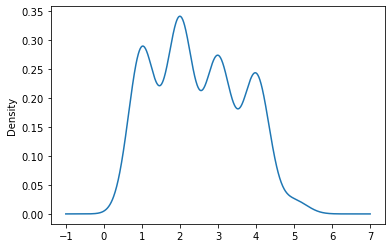

In [14]:
#Handling the missing values

x=Data['SES']
x.plot(kind='density')
print('This distribution has skew', x.skew())
print('This distribution has kurtosis', x.kurt())

This distribution has skew -2.366086132004125
This distribution has kurtosis 7.515849414549589


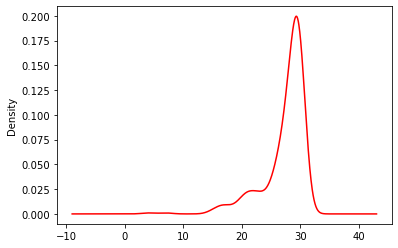

In [15]:
y=Data['MMSE']
y.plot(kind='density',color='red')
print('This distribution has skew', y.skew())
print('This distribution has kurtosis', y.kurt())

In [16]:
#Since both are negatively skewed, repacing the negative values by median
Data['SES']=Data['SES'].fillna(Data['SES'].median())
Data['MMSE']=Data['MMSE'].fillna(Data['MMSE'].median())

In [17]:
#Changing all the values into numerical values
Data['Group'] = Data['Group'].apply(lambda x:1 if x=='Demented' else 0)
Data['Gender'] = Data['Gender'].apply(lambda x:1 if x=='M' else 0)

In [18]:
Data.Group

0      0
1      0
2      1
3      1
4      1
      ..
368    1
369    1
370    0
371    0
372    0
Name: Group, Length: 373, dtype: int64

# Data Visulization

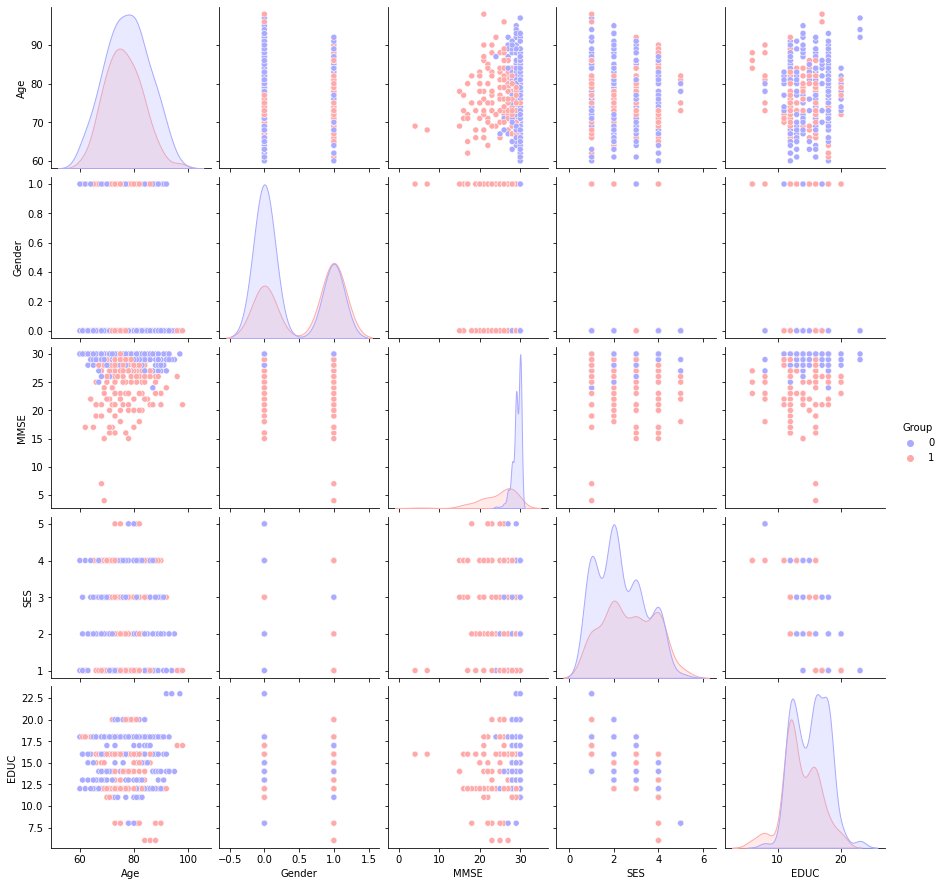

In [19]:
#pairplot

sns.pairplot(Data[['Age', 'Gender','Group', 'MMSE', 'SES', 'EDUC']],hue='Group',palette='bwr')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

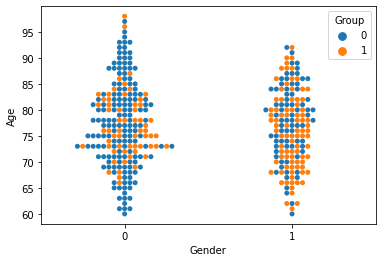

In [20]:
#Distribution - Swarmplot

sns.swarmplot(x = Data['Gender'], y = Data['Age'], hue = Data['Group'])

<AxesSubplot:xlabel='MMSE', ylabel='SES'>

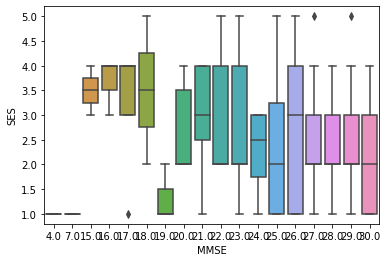

In [21]:
#Barplot

sns.boxplot(x = Data['MMSE'], y = Data['SES'])

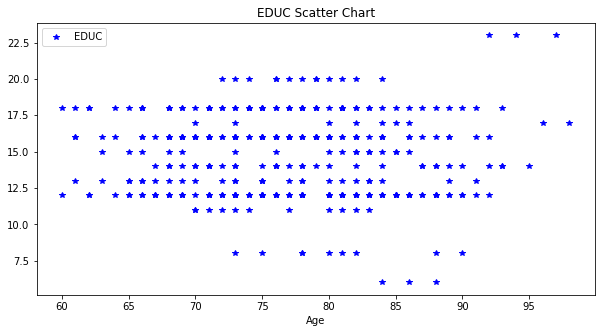

In [22]:
#Scatterplot

Data.plot(kind = 'line', x = 'Age',  y = 'EDUC', figsize =(10, 5), style = 'b*',
         title = 'EDUC Scatter Chart') 
plt.show()

<AxesSubplot:xlabel='MMSE', ylabel='Density'>

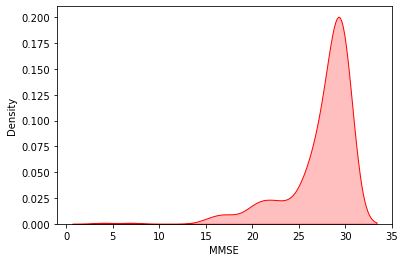

In [23]:
#Distribution

sns.kdeplot(Data['MMSE'], color = 'Red', shade = True)

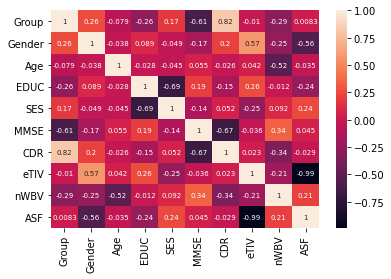

In [24]:
#Correlation

corr1 = Data.corr()
sns.heatmap(corr1, annot = True, annot_kws = {'size' : 7})  #annot = show values of each 
plt.show()

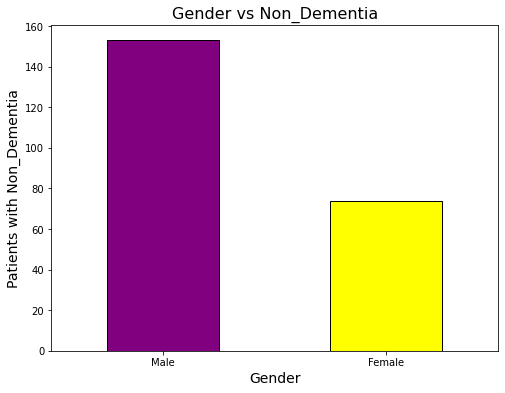

In [25]:
#Bar plot

Nondemented_group = Data[Data['Group']==0]['Gender'].value_counts()
Nondemented_group = pd.DataFrame(Nondemented_group)
Nondemented_group.index=['Male', 'Female'] 
Nondemented_group['Gender'].plot(kind='bar',color=['purple','yellow'],edgecolor='Black',figsize=(8,6))
plt.title('Gender vs Non_Dementia', size=16)
plt.xlabel('Gender', size=14)
plt.ylabel('Patients with Non_Dementia', size=14)
plt.xticks(rotation=0)
plt.show()

# Machine Learning Model

In [26]:
x=Data.iloc[:,1:].values
y=Data.iloc[:,0].values

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [28]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [29]:
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

C:\Users\LEENA\anaconda3\envs\envbsc\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9464285714285714


# Model Evaluation

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.93      0.93      0.93        44

    accuracy                           0.95       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.95      0.95      0.95       112



<AxesSubplot:>

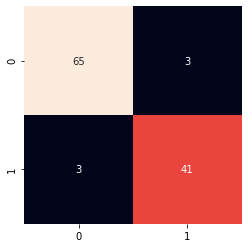

In [32]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)